---
title: データフレームの作り方
subject: pandasの使い方
keywords: [python, pandas]
authors:
  - Shota Takahashi
exports:
  - format: pdf  
---

In [1]:
import random
import pandas as pd
import numpy as np

print(pd.__version__)


2.2.1


# 乱数を使ったサンプルデータしたい

- ``x``: ガウス分布
- ``y``: `(4, 8)`の一様分布
- ``y``: `(0, 10)`の整数の一様分布

## リスト型リストを変換したい

- リスト型リスト（``list[list]``）、タプル型リスト（``list[tuple]``）、リスト型タプル（``tuple[list]``）、タプル型タプル（``tuple[tuple]``）をデータフレームに変換します
- ``columns``オプションを使ってカラム名を変更できます

In [2]:
samples = [
    (random.gauss(), random.uniform(4, 8), random.randint(0, 10)) for i in range(1000)
]
data = pd.DataFrame(samples, columns=["x", "y", "z"])
data


,x,y,z
0,-0.768916,6.596215,3
1,-0.012086,4.802052,0
2,-0.037284,7.508123,5
3,0.737801,7.927777,3
4,-0.449228,7.362634,10
...,...,...,...
995,-0.485031,5.000974,6
996,-0.281619,6.951085,1
997,-0.689367,6.320517,4
998,1.972567,7.436365,4


## 辞書型リストを変換したい

- 辞書型リスト（``list[dict[str, Any]]``）、辞書型タプル（``tuple[dict[str, Any]]``）をデータフレームに変換できます
- 辞書のキーがカラム名になります

In [3]:
samples = (
    {"x": random.gauss(), "y": random.uniform(4, 8), "z": random.randint(10, 10)}
    for i in range(1000)
)
data = pd.DataFrame(samples)
data


,x,y,z
0,0.643383,4.218181,10
1,-0.912839,7.367658,10
2,0.963304,6.601785,10
3,0.218857,7.058591,10
4,-1.734513,5.271138,10
...,...,...,...
995,-0.627154,7.622700,10
996,-0.521531,4.315887,10
997,-0.093790,5.683328,10
998,-2.163069,5.287828,10


In [4]:
ages = [random.randint(18, 60) for i in range(100)]
data = pd.DataFrame({"age": ages})


`pd.DataFrame.hist`でビニングを指定して、ヒストグラムを描画できます。

<Axes: ylabel='Frequency'>

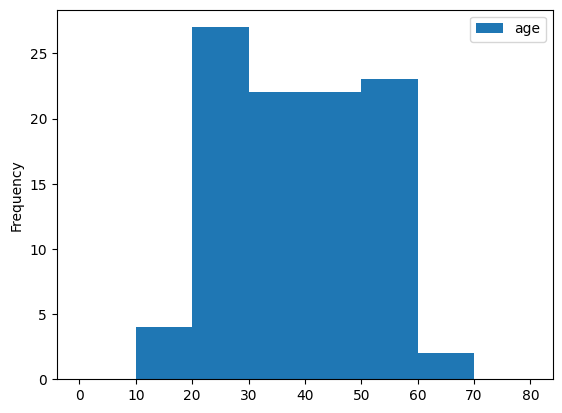

In [5]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
data.plot.hist(bins=bins)


しかし、これではそれぞれの階級（ビン）の度数（頻度）がわかりません。

階級と頻度を取得するには``np.histogram``を使います。
任意のビニングを指定すると、その度数（``freq``）と階級（``ages``）を取得できます。
連続的なデータを一括でビニングできるので大変便利です。

In [6]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
freq, rank = np.histogram(ages, bins=bins)

print(f"freqの要素数: {len(freq)}")
print(f"rankの要素数: {len(rank)}")


freqの要素数: 8
rankの要素数: 9


``度数（頻度）の要素数`` + 1 = ``階級の要素数``となります。
（階級の区間の中に、頻度の値が入るため）

<Axes: xlabel='age'>

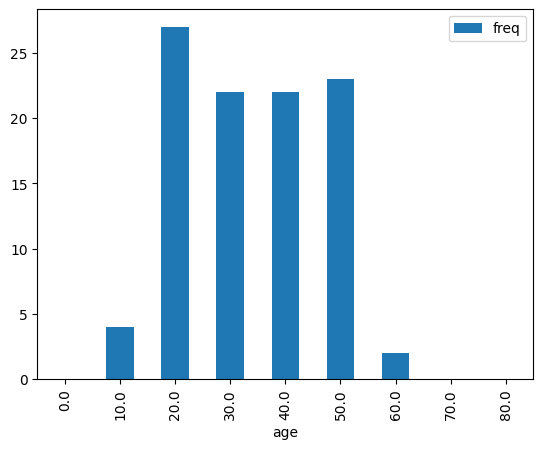

In [8]:
data = pd.DataFrame(data=[rank, freq], index=["age", "freq"]).T
data.plot.bar(x="age", y="freq")


In [21]:
rank = pd.cut(ages, bins=bins)
type(rank)


pandas.core.arrays.categorical.Categorical

In [29]:
rank, freq = pd.cut(ages, bins=bins, retbins=True)


In [30]:
rank
freq


array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [19]:
r


[(20, 30], (20, 30], (40, 50], (20, 30], (50, 60], ..., (30, 40], (50, 60], (20, 30], (50, 60], (40, 50]]
Length: 100
Categories (8, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]